In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [3]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [4]:
targetDir = "../data/output/d1/result/"
speedDir = "../data/output/d1/speed/"
brakeDir = "../data/output/d1/brake/"
accelDIr = "../data/output/d1/accel/"
steeringPositiveDir = "../data/output/d1/steeringPositive/"
steeringNegativeDir = "../data/output/d1/steeringNegative/"

In [5]:
df1 = pd.read_csv(speedDir + "result.csv")
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + "result.csv")
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + "result.csv")
df5.columns = [["id", "steeringNegative"]]

In [6]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")

In [7]:
rmf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
rmf = rmf[["red", "yellow", "green", "stop", "brake", "accel", "steeringPositive",  "steeringNegative"]]
rmf.columns = ["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive",  "steeringNegative"]

In [8]:
rmf.describe()

,red,yellow,green,slow,brake,accel,steeringPositive,steeringNegative
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,24.628866,142.494845,70.706186,127.809278,40.561856,59.819588,45.886598,69.077320
std,42.578259,115.097312,124.268434,342.086072,58.297600,73.636859,102.050874,199.483632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.750000,0.000000,0.000000,1.000000,8.250000,1.000000,0.000000
50%,3.000000,136.500000,5.000000,1.000000,15.000000,23.000000,2.000000,2.000000
75%,26.750000,218.500000,94.750000,26.500000,55.000000,89.500000,25.500000,23.750000
max,188.000000,543.000000,709.000000,2380.000000,321.000000,389.000000,527.000000,1460.000000


In [9]:
colors = [
    "#ff0000",
    "#ffa500",
    "#ffff00",
    "#008000",
    "#00ffff",
    "#0000ff",
    "#800080"
]

# VBGMM

In [10]:
rmf["sum"] = rmf["red"] + rmf["yellow"] + rmf["green"] + rmf["slow"] + rmf["brake"] + rmf["accel"] + rmf["steeringPositive"] + rmf["steeringNegative"]

for key in rmf.columns:
    if key == "sum":
        continue
    rmf[key] = rmf[key] / rmf["sum"]
    
rmf = rmf[["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive", "steeringNegative"]]

In [11]:
sd = 1
np.random.seed(1)
random.seed(1)

In [12]:
vb = BayesianGaussianMixture(n_components=7, weight_concentration_prior=0.1, n_init=5).fit(rmf)
print "classes:          ", set(vb.predict(rmf))
print "lower bound: ", vb.lower_bound_

classes:           set([0, 1, 2, 3, 4, 5, 6])
lower bound:  5218.39521644


In [13]:
vb.weights_

array([ 0.21396827,  0.13593815,  0.0605542 ,  0.11183905,  0.20644856,
        0.16583511,  0.10541666])

In [14]:
ref = pd.DataFrame(vb.means_)
ref.columns = [["red", "yellow", "green", "slow", "brake", "accel", "steeringPositive", "steeringNegative"]]
ref

,red,yellow,green,slow,brake,accel,steeringPositive,steeringNegative
0,0.182715,0.635254,0.013551,0.006577,0.030190,0.088182,0.024216,0.019314
1,0.005562,0.094664,0.172945,0.360553,0.065955,0.097955,0.033101,0.169266
2,0.045785,0.426421,0.020606,0.014212,0.033844,0.103608,0.348140,0.007382
3,0.546074,0.323268,0.003927,0.004227,0.004859,0.058330,0.054121,0.005194
4,0.048964,0.512943,0.108738,0.019185,0.149568,0.134242,0.014323,0.012036
5,0.008677,0.242903,0.174701,0.230865,0.082676,0.114929,0.111455,0.033793
6,0.063722,0.373420,0.068947,0.005869,0.033880,0.130015,0.013190,0.310957


# Plot histgram of each clusters

## Middle speed and no steering

(0, 1)

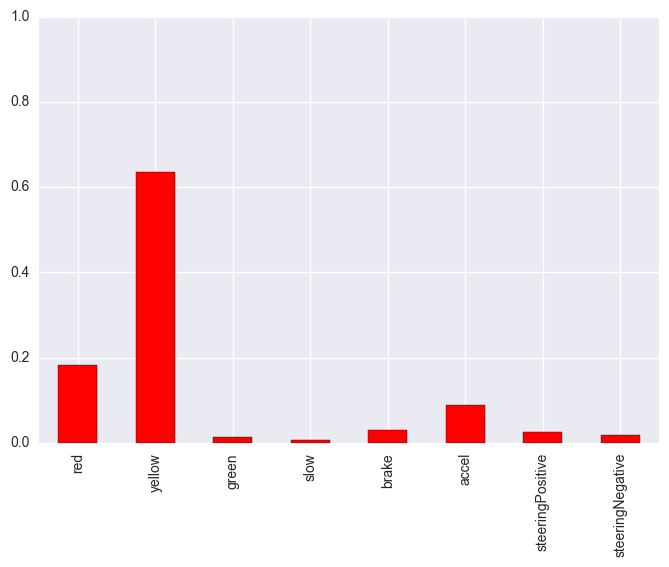

In [15]:
ref.ix[0].plot(kind='bar', color=colors[0])
plt.ylim(0, 1)

## Everything mediocre

(0, 1)

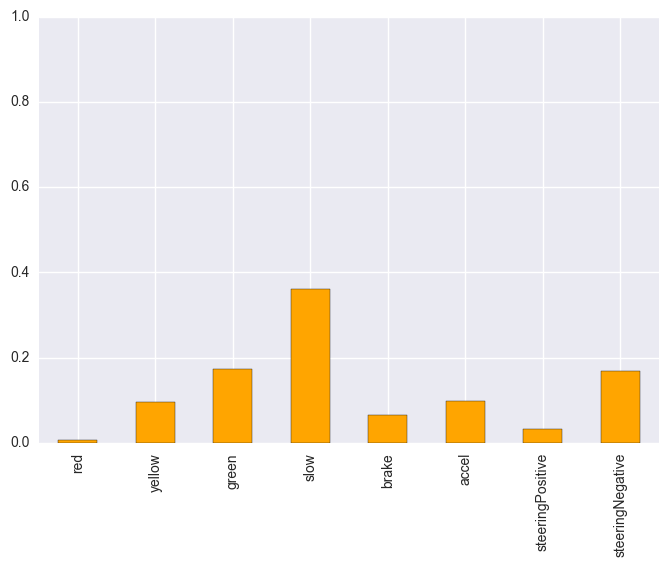

In [16]:
ref.ix[1].plot(kind='bar', color=colors[1])
plt.ylim(0, 1)

## High speed and no steering

(0, 1)

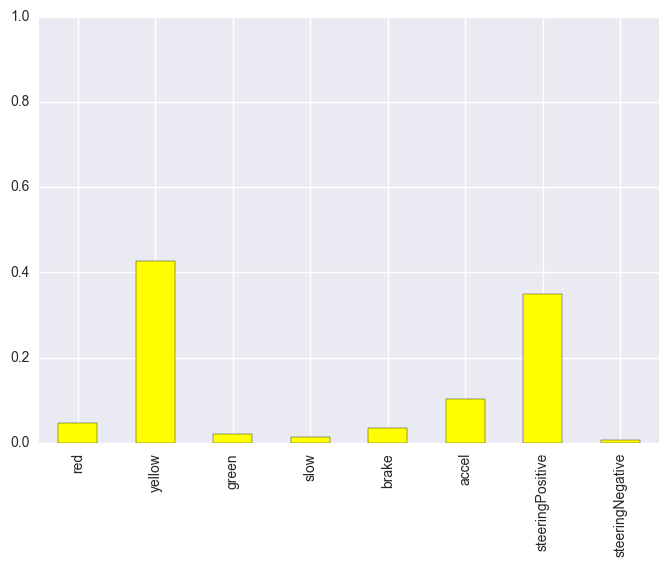

In [17]:
ref.ix[2].plot(kind='bar', color=colors[2])
plt.ylim(0, 1)

## Middle speed and turn left

(0, 1)

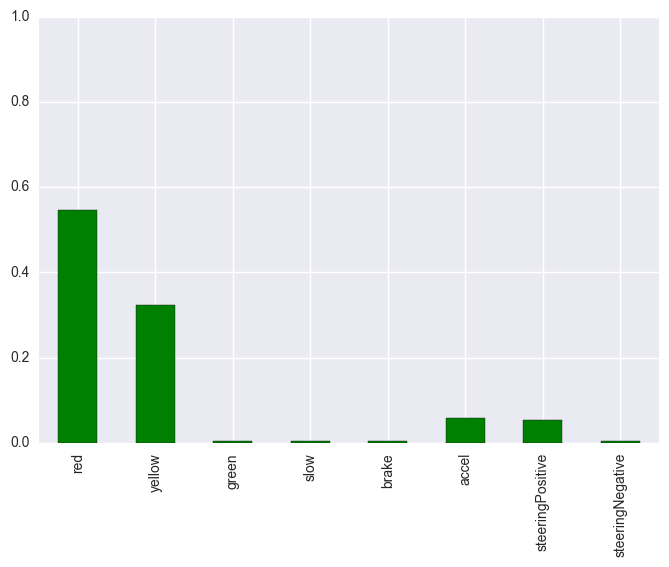

In [18]:
ref.ix[3].plot(kind='bar', color=colors[3])
plt.ylim(0, 1)

## Middle speed and trun right

(0, 1)

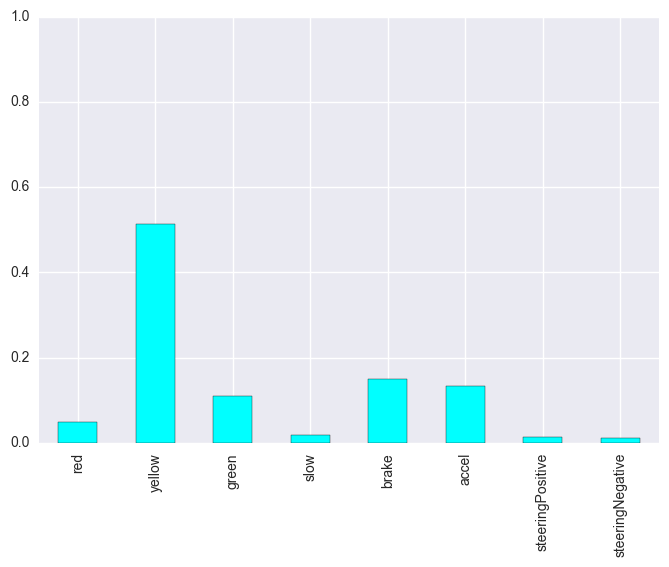

In [19]:
ref.ix[4].plot(kind='bar', color=colors[4])
plt.ylim(0, 1)

## Infront of intersection

(0, 1)

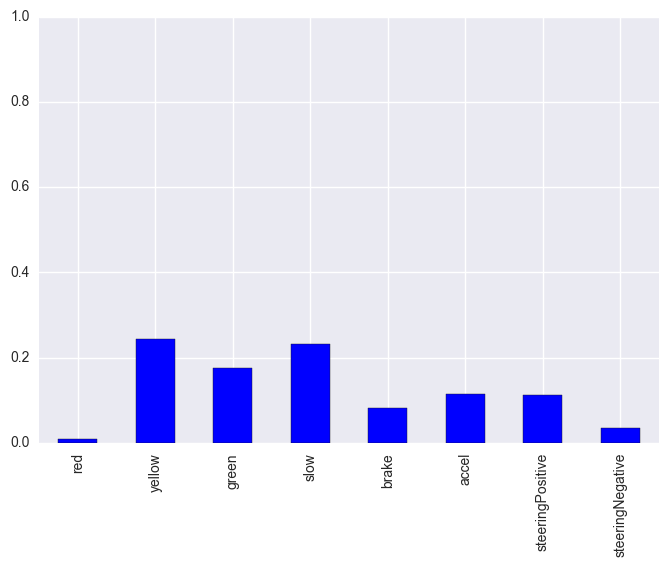

In [20]:
ref.ix[5].plot(kind='bar', color=colors[5])
plt.ylim(0, 1)

## High speed and turn left

(0, 1)

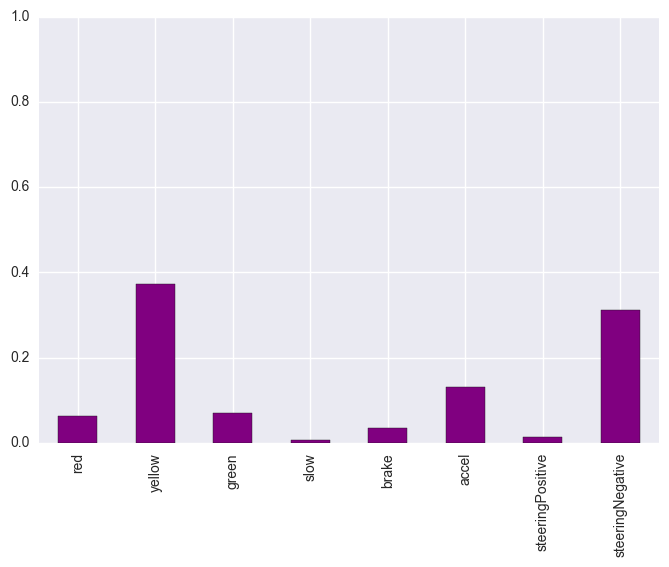

In [21]:
ref.ix[6].plot(kind='bar', color=colors[6])
plt.ylim(0, 1)

# Save

In [22]:
pred = zip(rmf.index, vb.predict(rmf))
gridSize = len(df)
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "aaaa.csv", result, delimiter=",", fmt="%d")